<a href="https://colab.research.google.com/github/PaulAlexInc/AirlinePassengerSatisfaction-Dataset/blob/main/Clustering_AirlinePassengerSatisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLUSTERING

In [ ]:
input ='0.81788702, -1.03517064,  1.70385282,  0.62164094,  0.17214266, 0.79783121, -0.1617392 ,  0.54469211, -0.34030327,  1.22713822, 1.25917014,  1.25097391,  1.16171635, -1.03534761,  1.14406253, 1.29899809,  0.95381034, -0.98593202,  0.47603968, -0.66337845, -0.9627357 ,  1.11636981, -0.28227491,  1.1304853 '
#ensure that all floating point numbers are separated by a comma and a space

In [ ]:
input.split(", ") #we can't directly convert it to float, we'll get an error. Instead we need to extract each value

['0.81788702',
 '-1.03517064',
 ' 1.70385282',
 ' 0.62164094',
 ' 0.17214266',
 '0.79783121',
 '-0.1617392 ',
 ' 0.54469211',
 '-0.34030327',
 ' 1.22713822',
 '1.25917014',
 ' 1.25097391',
 ' 1.16171635',
 '-1.03534761',
 ' 1.14406253',
 '1.29899809',
 ' 0.95381034',
 '-0.98593202',
 ' 0.47603968',
 '-0.66337845',
 '-0.9627357 ',
 ' 1.11636981',
 '-0.28227491',
 ' 1.1304853 ']

In [ ]:
#We can modify the above code as follows to remove the spaces at the front and behind
[i.strip() for i in input.split(", ")]

['0.81788702',
 '-1.03517064',
 '1.70385282',
 '0.62164094',
 '0.17214266',
 '0.79783121',
 '-0.1617392',
 '0.54469211',
 '-0.34030327',
 '1.22713822',
 '1.25917014',
 '1.25097391',
 '1.16171635',
 '-1.03534761',
 '1.14406253',
 '1.29899809',
 '0.95381034',
 '-0.98593202',
 '0.47603968',
 '-0.66337845',
 '-0.9627357',
 '1.11636981',
 '-0.28227491',
 '1.1304853']

for i in input.split(", ")] iterates over all the elements in the result of input.split. We can type cast this to float


In [ ]:
[float(i.strip()) for i in input.split(", ")]

[0.81788702,
 -1.03517064,
 1.70385282,
 0.62164094,
 0.17214266,
 0.79783121,
 -0.1617392,
 0.54469211,
 -0.34030327,
 1.22713822,
 1.25917014,
 1.25097391,
 1.16171635,
 -1.03534761,
 1.14406253,
 1.29899809,
 0.95381034,
 -0.98593202,
 0.47603968,
 -0.66337845,
 -0.9627357,
 1.11636981,
 -0.28227491,
 1.1304853]

## Airline Passenger Satisfaction<br>
What factors lead to customer satisfaction for an airline?<br>
[Dataset
](https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction)

In [ ]:
# importing libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist #cdist helps in calculating the euclidean distance matrix

import seaborn as sns
from sklearn.cluster import KMeans as kmeans
from sklearn.decomposition import PCA
import plotly.express as px
import matplotlib.pyplot as plt


In [ ]:
# reading the dataset

data = pd.read_csv("test.csv", index_col='Unnamed: 0')# Unnamed: 0 is the index column present in the dataset, if its not explicitly mentioned this way, it will also get displayed
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

We have both categorical and numerical values

## Data Preprocessing


First we need to encode the data


In [ ]:
for uni in data.columns:
  print(uni)
  print(data[uni].unique())

id
[19556 90035 12360 ... 37675 90086 34799]
Gender
['Female' 'Male']
Customer Type
['Loyal Customer' 'disloyal Customer']
Age
[52 36 20 44 49 16 77 43 47 46 33 60 50 31 55 25 30 62 24 22 51 56 41 53
 12 39 32 40 42 28 59 58 27 67 70 66 19 69 35 54 26 61 21 37 45 38  7 34
 17 15 48 13 11 29  8 18 23 65 57 80 64  9 14 68 10 79 63 73 74 71 72 76
 78 75 85]
Type of Travel
['Business travel' 'Personal Travel']
Class
['Eco' 'Business' 'Eco Plus']
Flight Distance
[ 160 2863  192 ... 3714 3097 3518]
Inflight wifi service
[5 1 2 0 3 4]
Departure/Arrival time convenient
[4 1 0 3 5 2]
Ease of Online booking
[3 2 0 4 5 1]
Gate location
[4 1 2 3 5]
Food and drink
[3 5 2 4 1 0]
Online boarding
[4 2 1 5 3 0]
Seat comfort
[3 5 2 4 1]
Inflight entertainment
[5 4 2 1 3 0]
On-board service
[5 4 1 2 3 0]
Leg room service
[5 4 1 2 3 0]
Baggage handling
[5 4 3 1 2]
Checkin service
[2 3 4 1 5]
Inflight service
[5 4 2 1 3 0]
Cleanliness
[5 2 4 3 1 0]
Departure Delay in Minutes
[  50    0   77    1   28   29 

- First we need to drop id column since it is like an identifier and it is not useful

- Gender<br>
['Female' 'Male']<br>

This column is important, since there are only two categories and multiple categories are not present, it doesn't require encoding, but this cannot be handled by a numerical model, so we'll have to change these columns to 0 or 1. 
- One way of doing it is to perform onehotencoding and then remove the unnecessary columns. Suppose we perform onehotencoding on the Gender column, we'll get two columns Gender Female and Gender Male and we can drop one of them. For example if we drop Gender Female, Gender Male stores all the information that is necessary, if Gender Male is 1, the person is a male otherwise a Female.

- We can do the same thing for 
Customer Type<br>
['Loyal Customer' 'disloyal Customer']<br>
After performing encoding we can delete one of the columns, lets say we delete Customer Type : loyal Customer. If disloyal customer is 1, the person is disloyal, if it is 0 the person is loyal.




In [ ]:
data.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

'Inflight wifi service',<br>'Departure/Arrival time convenient',<br> 'Ease of Online booking',<br>'Gate location',<br> 'Food and drink',<br> 'Online boarding',<br> 'Seat comfort',<br>'Inflight entertainment',<br> 'On-board service',<br> 'Leg room service',<br>'Baggage handling',<br> 'Checkin service',<br> 'Inflight service',<br>'Cleanliness',<br> 'Departure Delay in Minutes',<br> 'Arrival Delay in Minutes'<br>

Though these variables are categorical, they are ordinal. Meaning though they have values from 0 to 5, 0 means worst and 5 means best(just like 0 and 1), so we need not encode them


In [ ]:
data = pd.get_dummies(data, columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class','satisfaction'])

In [ ]:
data.columns

Index(['id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'satisfaction_neutral or dissatisfied',
       'satisfaction_satisfied'],
      dtype='object')

- Now among these columns we can remove Gender_Female, Customer Type_disloyal Customer, Type of Travel_Business travel
- But for class we need to keep it since there are 3 columns

Now we can drop the unnecssary columns

In [ ]:
data.isnull().sum()

id                                       0
Age                                      0
Flight Distance                          0
Inflight wifi service                    0
Departure/Arrival time convenient        0
Ease of Online booking                   0
Gate location                            0
Food and drink                           0
Online boarding                          0
Seat comfort                             0
Inflight entertainment                   0
On-board service                         0
Leg room service                         0
Baggage handling                         0
Checkin service                          0
Inflight service                         0
Cleanliness                              0
Departure Delay in Minutes               0
Arrival Delay in Minutes                83
Gender_Female                            0
Gender_Male                              0
Customer Type_Loyal Customer             0
Customer Type_disloyal Customer          0
Type of Tra

since Arrival Delay in Minutes has null values, we can either impute it or drop it, in this case we'll drop it.


In [ ]:
data.drop(['id','Gender_Female','Customer Type_disloyal Customer','Type of Travel_Business travel','satisfaction_neutral or dissatisfied'
            , 'Arrival Delay in Minutes'], axis =1 , inplace=True)

In [ ]:
data.shape

(25976, 24)

In [ ]:
data.isnull().sum()

Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Gender_Male                          0
Customer Type_Loyal Customer         0
Type of Travel_Personal Travel       0
Class_Business                       0
Class_Eco                            0
Class_Eco Plus                       0
satisfaction_satisfied               0
dtype: int64

## Data Scaling

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
scaled_data.shape

(25976, 24)

In [ ]:
scaled_data[0] #first row

array([ 0.81788702, -1.03517064,  1.70385282,  0.62164094,  0.17214266,
        0.79783121, -0.1617392 ,  0.54469211, -0.34030327,  1.22713822,
        1.25917014,  1.25097391,  1.16171635, -1.03534761,  1.14406253,
        1.29899809,  0.95381034, -0.98593202,  0.47603968, -0.66337845,
       -0.9627357 ,  1.11636981, -0.28227491,  1.1304853 ])

We can cluster only the data that have some similarity<br>
- One such measure that tells us how linearly related two variables are is correlation<br>
- But here we'll be using Euclidean Distance, we'll visualise the data based on the euclidean distance<br>

- Euclidean distance : If we have two points (a1, b1) and (a2,b2), the euclidean distance is simply root over of (x1-x2)^2 + (y1-y2)^2.

## Euclidean Distance matrix

In [ ]:
euc_dis = cdist(scaled_data, scaled_data, metric='euclidean') # it is euclidean by default, not necessary to define explicitly
euc_dis.shape

(25976, 25976)

- execution of euc_dis.shape takes time since we have around 26000 rows
- now it has calculated the distance between the rows hence it is a square matrix with size equal to the number of rows.

In [ ]:
euc_dis

array([[0.        , 6.70168409, 8.12247985, ..., 7.11361848, 6.05968587,
        8.80880231],
       [6.70168409, 0.        , 8.19742099, ..., 8.2012265 , 4.71108652,
        9.31116695],
       [8.12247985, 8.19742099, 0.        , ..., 6.28983377, 7.03978626,
        6.50996386],
       ...,
       [7.11361848, 8.2012265 , 6.28983377, ..., 0.        , 6.69936669,
        6.03501738],
       [6.05968587, 4.71108652, 7.03978626, ..., 6.69936669, 0.        ,
        8.71316452],
       [8.80880231, 9.31116695, 6.50996386, ..., 6.03501738, 8.71316452,
        0.        ]])

There are two ways to visualise the Euclidean Distance Matrix
- We can create a dataframe and then use the describe function
- We can create a heatmap

In [ ]:
#pd.DataFrame(euc_dis).describe()

If required we can also take a certain number of rows and columns since execution for 2000 rows takes a lot of time.

In [ ]:
euc_dis[:2000, :2000]

array([[0.        , 6.70168409, 8.12247985, ..., 8.25308494, 6.68654086,
        6.85885032],
       [6.70168409, 0.        , 8.19742099, ..., 8.85870551, 7.49660814,
        7.68189114],
       [8.12247985, 8.19742099, 0.        , ..., 7.79171944, 5.57680258,
        6.44371595],
       ...,
       [8.25308494, 8.85870551, 7.79171944, ..., 0.        , 6.69621832,
        7.43991868],
       [6.68654086, 7.49660814, 5.57680258, ..., 6.69621832, 0.        ,
        5.70753098],
       [6.85885032, 7.68189114, 6.44371595, ..., 7.43991868, 5.70753098,
        0.        ]])

In [ ]:
pd.DataFrame(euc_dis[:2000, :2000]).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,6.681634,6.433744,7.162477,8.088778,6.494817,6.990982,7.734302,6.154105,6.674849,5.704131,6.749461,6.785485,6.942863,7.469043,5.940821,6.921074,6.447873,7.447959,6.397920,7.098646,6.646790,6.149918,6.459469,6.511414,6.641561,6.457583,7.092657,7.129073,6.472006,5.751393,7.046287,6.629876,6.662454,6.631648,6.646059,7.288276,5.773317,7.187725,6.418655,6.831770,...,6.312769,6.944194,6.717017,6.013297,6.976369,6.001593,6.999049,6.071259,6.156691,6.403077,7.997113,5.961320,7.512872,8.923925,5.949698,9.945741,6.360221,7.398452,6.631234,7.026512,6.576256,7.247981,6.282668,7.074948,6.854593,6.721433,5.979539,6.629364,6.858161,6.966573,6.201157,6.093682,7.254639,6.243578,7.093787,6.871799,5.605956,7.603743,6.657131,6.748926
std,1.319751,1.594570,1.367127,1.357633,1.052328,1.146125,1.866255,1.464463,1.311968,1.505167,1.066018,1.188625,1.868567,1.462280,1.549915,1.363903,1.229528,1.274971,1.290034,1.837100,1.742150,1.283056,1.183038,1.296164,1.218623,1.277259,1.304932,1.083612,1.838374,1.165171,1.070382,1.117027,1.218279,1.378150,1.242370,1.327604,1.442786,1.638890,1.146085,1.296486,...,1.670895,1.871458,1.842849,1.152122,1.319257,1.561763,1.043614,1.725493,1.719560,1.193483,1.150375,1.130065,1.352121,1.221406,0.998811,1.074144,1.455408,1.344857,1.274737,1.047568,1.784061,1.221137,1.136342,1.463444,1.663799,1.079527,1.528428,1.091255,1.392850,1.270730,1.373232,1.417831,1.274207,1.177118,1.224828,1.296065,1.203978,1.206865,1.141513,1.189531
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.770002,5.556321,6.291514,7.318414,5.866210,6.309212,6.649850,5.215055,5.856924,4.816506,6.100113,6.144975,5.836680,6.577146,5.011870,6.124795,5.713292,6.573060,5.658947,6.038917,5.528626,5.481118,5.751063,5.659312,5.898437,5.769787,6.197617,6.448001,5.129160,5.054973,6.389840,5.961591,5.988407,5.721264,5.897216,6.504845,4.848783,6.277465,5.813298,6.161405,...,5.387520,5.678227,5.667394,5.261984,6.177174,5.035212,6.382269,5.079968,4.895494,5.646570,7.267043,5.366965,6.663566,8.280490,5.373077,9.350260,5.492882,6.555704,

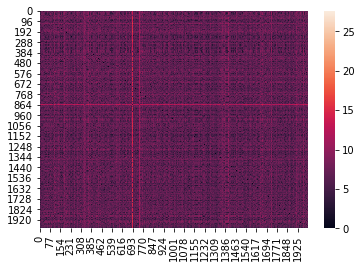

In [ ]:
sns.heatmap(euc_dis[:2000, :2000])

- Seeing the heatmap we can see that the plot is considerably dark or most of the rows lie in the area of euclidean distance 0 to 15.
- We can also see that the maximum euclidean distance goes up to 35

Euclidean distance matrix actually helps us understand whether clustering would lead us to good results or not.

# KMeans with 2 clusters


In [ ]:
#creating and fitting the model
model = kmeans(n_clusters=2, n_init=25).fit(scaled_data)
#n_init=25 gives the number of iterations the cluster will go through
# note: for this to work there shouldn't be NaN values

In [ ]:
model.labels_

array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

These are the cluster numbers, 0 is a cluster, 1 is another cluster

In [ ]:
model.cluster_centers_

array([[-0.13309558, -0.32207708, -0.26231169,  0.01837439, -0.17563696,
        -0.01124759, -0.27226938, -0.45746986, -0.38992569, -0.45852311,
        -0.35123095, -0.32475158, -0.30003347, -0.2345754 , -0.29348213,
        -0.35740207,  0.02705024,  0.00708964, -0.12994019,  0.40796794,
        -0.54857505,  0.49147544,  0.11411111, -0.64937774],
       [ 0.18120359,  0.4384933 ,  0.35712545, -0.02501589,  0.23912174,
         0.01531309,  0.37068238,  0.62282442,  0.5308661 ,  0.62425838,
         0.47818497,  0.44213452,  0.40848193,  0.31936374,  0.39956257,
         0.48658667, -0.03682767, -0.00965223,  0.17690767, -0.5554298 ,
         0.74685999, -0.66912147, -0.15535708,  0.88409828]])

- These are the cluster centres for each of the columns for the two classes.
- 0.17949263 is the cluster centre for the first column of class 0
- 0.43696794 is the cluster centre for the second column of class 0
-  [-0.13275627, -0.32319005, -0.2642437 ,  0.01847482, -0.17704095,<br>
  -0.01133338, -0.27334954, -0.45899015, -0.3911373 , -0.46018745,<br>
  -0.35268541, -0.32594174, -0.30035617, -0.2351704 , -0.29471182,<br>
  -0.35827279,  0.02742069,  0.00747065, -0.1286197 ,  0.41010721,<br>
  -0.55097365,  0.4935419 ,  0.11476682, -0.65070892]])<br>
  These are the cluster centres of the second cluster <br>

In [ ]:
model.inertia_

530897.7551469513

Now we need to visualise whether the clustering has happened or not. As we saw in the previous cell's output, there are so many dimensions, hence it won't be easy to plot it on a 25 or 26 dimensional plane and visualise it. So what we can do is, we can apply a dimensionality reduction technique called principal component analysis and what we can do is, we'll reduce the data(previous cell's output) in two dimensions and then we'll plot those two dimensions<br>
[Principal component analysis (PCA) ](https://setosa.io/ev/principal-component-analysis/)

Before visualising we need to create a dataset with the data and labels_ as a column

## Visualising the clusters

In [ ]:
# initialising the PCA
pca=PCA(n_components=2) #we're calling the PCA method and we're specifying that we want two components.

#fitting the PCA
principalComponents = pca.fit_transform(scaled_data)#we're fitting the pca method on our dataset

#making a dataframe of the principal components
principalDf = pd.DataFrame(data = principalComponents, columns=['principal_component_1', 'principal_component_2'])# after gettong the output we're creating a dataset

In [ ]:
principalDf

,principal_component_1,principal_component_2
0,-1.837479,-1.685902
1,-2.729304,2.509010
2,3.531637,0.826091
3,1.083185,3.467324
4,1.716548,-0.234162
...,...,...
25971,-0.700157,1.099815
25972,-2.980237,-1.079532
25973,2.663324,-0.851268
25974,-2.001259,0.271857


In [ ]:
principalDf['Label'] = model.labels_

In [ ]:
principalDf.head()

,principal_component_1,principal_component_2,Label
0,-1.837479,-1.685902,1
1,-2.729304,2.509010,1
2,3.531637,0.826091,0
3,1.083185,3.467324,0
4,1.716548,-0.234162,0


Now we have the information as to which row belongs to which cluster

In [ ]:
px.scatter(data_frame=principalDf, x='principal_component_1', y='principal_component_2', color=model.labels_)

- yellow is cluster 1
- blue is cluster 0


# Elbow Method

In [ ]:
# list to store the within sum of squared error(inertia) for the different clusters given the respective cluster size
wss = []

# loop to iterate over the no of clusters and calculate the wss
for i in range(1,11): # 1 to 10
  #kmeans
  fitx = kmeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(scaled_data)
  # appending the value
  wss.append(fitx.inertia_)

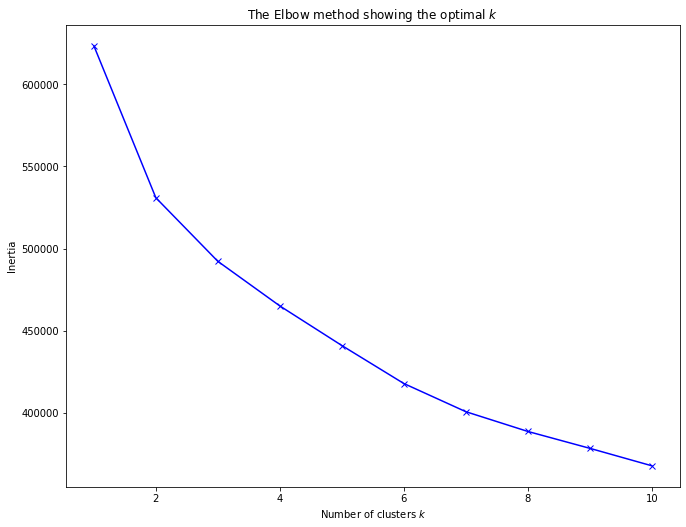

In [ ]:
plt.figure(figsize=(11,8.5))
plt.plot(range(1,11), wss, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow method showing the optimal $k$')
plt.show()

This is the elbow curve for 10 clusters, we can do the same for different number of clusters

If we notice as we come from top to bottom ,from 1 to 2, there is a significant decrease, as we come from 2 to 3, again there is a significant decrease. But as we keep coming down the decrease also becomes smaller and smaller. So what we need is a point, beyond which or to the right of which the drop is not really significant

Here we can take 6 as the point



# KMeans with 6 clusters

In [ ]:
# creating and fitting the model
model = kmeans(n_clusters=6, n_init=25).fit(scaled_data)

In [ ]:
model.labels_#the clusters are numbered from 0 to 5

array([2, 3, 1, ..., 0, 3, 5], dtype=int32)

In [ ]:
model.cluster_centers_#cluster centres for each of the clusters

array([[-1.55472039e-01, -4.20851897e-01, -1.74195448e-01,
         4.08326335e-01, -2.28055959e-01, -3.68389428e-02,
        -9.71197885e-02, -4.50144228e-01, -2.23895433e-01,
        -7.99537902e-02,  9.89737985e-02, -1.07747278e-01,
         2.16127280e-01,  7.53174957e-02,  2.45611751e-01,
        -1.27629167e-01,  7.29291848e-03,  1.07917291e-01,
         4.68275925e-01,  1.36608156e+00, -8.99415878e-01,
         1.05271186e+00, -2.82274905e-01, -6.94335730e-01],
       [-6.62832274e-01, -4.91972379e-01, -1.74986691e-01,
        -5.71954379e-01, -1.96891766e-01, -1.21635666e-02,
        -2.02336149e-01, -5.78831819e-01, -4.00373261e-01,
        -2.87900981e-01, -1.54441885e-01, -1.30568805e-01,
        -2.93892379e-03, -1.36834501e-01,  5.31884202e-03,
        -2.56570756e-01,  9.29009047e-03, -3.63211684e-02,
        -2.08029860e+00, -6.55075996e-01, -2.98309902e-01,
         4.48395901e-01, -2.82274905e-01, -5.33661327e-01],
       [ 1.50156178e-01,  3.85481339e-01,  1.24791864e

In [ ]:
model.inertia_

421049.176395662

In [ ]:
#visualising the cluster
# initialising the PCA
pca=PCA(n_components=2) #we're calling the PCA method and we're specifying that we want two components.

#fitting the PCA
principalComponents = pca.fit_transform(scaled_data)#we're fitting the pca method on our dataset

#making a dataframe of the principal components
principalDf = pd.DataFrame(data = principalComponents, columns=['principal_component_1', 'principal_component_2'])# after gettong the output we're creating a dataset


In [ ]:
principalDf

,principal_component_1,principal_component_2
0,-1.837479,-1.686012
1,-2.729304,2.509145
2,3.531637,0.826018
3,1.083185,3.467202
4,1.716547,-0.234233
...,...,...
25971,-0.700157,1.099957
25972,-2.980236,-1.079755
25973,2.663324,-0.851417
25974,-2.001258,0.271584


In [ ]:
principalDf['Label'] = model.labels_

In [ ]:
principalDf.head()

,principal_component_1,principal_component_2,Label
0,-1.837479,-1.686012,2
1,-2.729304,2.509145,3
2,3.531637,0.826018,1
3,1.083185,3.467202,5
4,1.716547,-0.234233,5


In [ ]:
px.scatter(data_frame=principalDf, x='principal_component_1', y='principal_component_2', color=model.labels_)

In [ ]:
#here model.label_ value is different, hence the colour will be different